In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
!conda install -y gdown

Retrieving notices: ...working... done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 23.11.0

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.11.0



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - gdown


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    filelock-3.13.1            |     pyhd8ed1ab_0          15 KB  conda-forge
    gdown-4.7.1                |     pyhd8ed1ab_0          19 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          34 KB

The following NEW packages will be INSTALLED:

  filelock           conda-forge/noarch::filelock-3.13.1-pyhd8ed1ab_0

In [ ]:
!gdown --id 1rxIHMPYPL4qnfjujvhiNGH2PnezOBKQa

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1rxIHMPYPL4qnfjujvhiNGH2PnezOBKQa
From (redirected): https://drive.google.com/uc?id=1rxIHMPYPL4qnfjujvhiNGH2PnezOBKQa&confirm=t&uuid=4a8353a6-b6ed-45b8-9340-9e583d08afea
To: /kaggle/working/q1_model2.pth
100%|█████████████████████████████████████████| 525M/525M [00:04<00:00, 121MB/s]


## Resnet50

In [ ]:
resnet50 = models.resnet50(pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 238MB/s] 


# Part 1

In [ ]:
# Define the transformer
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
cifar10_dataset_train = datasets.CIFAR10(root='./data', train=True,
                                   download=True, transform=transform)

cifar10_dataset_test = datasets.CIFAR10(root='./data', train=False,
                                   download=True, transform=transform)

# Filter the dataset to include only the first two classes
class_indices = [0, 1]
filtered_training_dataset = torch.utils.data.Subset(cifar10_dataset_train,
                                               [i for i in range(len(cifar10_dataset_train)) if cifar10_dataset_train.targets[i] in class_indices])

filtered_testing_dataset = torch.utils.data.Subset(cifar10_dataset_test,
                                               [i for i in range(len(cifar10_dataset_test)) if cifar10_dataset_test.targets[i] in class_indices])


# Create a data loader
train_data_loader = DataLoader(filtered_training_dataset, batch_size=64, shuffle=True)
test_data_loader = DataLoader(filtered_testing_dataset, batch_size=64, shuffle=True)


100%|██████████| 170498071/170498071 [00:08<00:00, 20752653.23it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
classes = cifar10_dataset_train.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

  0%|          | 0/157 [00:00<?, ?it/s]


class = automobile


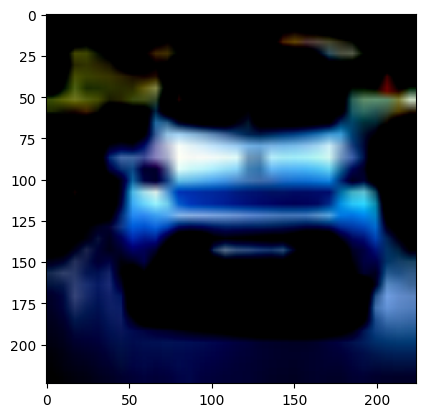

In [ ]:
for (data, targets) in tqdm(train_data_loader):
    index = 0
    plt.imshow(data[index].numpy().transpose(1, 2, 0))
    print(f'class = {classes[targets[index]]}')
    break

## **resnet50** architecture

In [ ]:
print(resnet50)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
from torch.nn.modules import ReLU,Linear,Dropout
# freeze all parameters
for param in resnet50.parameters():
    param.requires_grad = False

# change the output layer
my_classifier = torch.nn.Sequential(
    Linear(in_features=2048, out_features=4096, bias=True),
    ReLU(inplace=True),
    Dropout(p=0.5, inplace=False),
    Linear(in_features=4096, out_features=2048, bias=True),
    ReLU(inplace=True),
    Dropout(p=0.5, inplace=False),
    Linear(in_features=2048, out_features=2, bias=True),
)

resnet50.fc = my_classifier

In [ ]:
resnet50 = resnet50.cuda()
print(resnet50.fc)

Sequential(
  (0): Linear(in_features=2048, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=2048, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=2048, out_features=2, bias=True)
)


In [ ]:
# check the model parameters
for name, param in resnet50.named_parameters():
    if param.requires_grad:
        print(f"The layer '{name}' is not frozen.")

The layer 'fc.0.weight' is not frozen.
The layer 'fc.0.bias' is not frozen.
The layer 'fc.3.weight' is not frozen.
The layer 'fc.3.bias' is not frozen.
The layer 'fc.6.weight' is not frozen.
The layer 'fc.6.bias' is not frozen.


In [ ]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet50.parameters(), lr=0.01)
num_epochs = 25

losses = []
accuracies = []

for _epoch in range(num_epochs):
    epoch_loss = 0
    train_acc = 0
    for (data, targets) in tqdm(train_data_loader):
        data = data.cuda()
        targets = targets.cuda()

        optimizer.zero_grad()
        outputs = resnet50(data)
        loss = criterion(outputs, targets)

        _, predicted_train = torch.max(outputs, 1)
        train_acc += (predicted_train == targets).sum().item() / len(targets)

        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()

    epoch_loss /= len(train_data_loader)
    print(f'loss @ epoch {_epoch}: {epoch_loss}')
    print('train accuracy: ',(train_acc/len(train_data_loader))*100)
    losses.append(epoch_loss)
    accuracies.append((train_acc/len(train_data_loader))*100)




100%|██████████| 157/157 [00:31<00:00,  5.01it/s]


loss @ epoch 0: 8.325929641723633
train accuracy:  82.8125


100%|██████████| 157/157 [00:31<00:00,  5.02it/s]


loss @ epoch 1: 0.37247994542121887
train accuracy:  86.02707006369427


100%|██████████| 157/157 [00:31<00:00,  5.01it/s]


loss @ epoch 2: 0.41682255268096924
train accuracy:  82.17555732484077


100%|██████████| 157/157 [00:31<00:00,  5.04it/s]


loss @ epoch 3: 0.5522071719169617
train accuracy:  72.42237261146497


100%|██████████| 157/157 [00:31<00:00,  4.95it/s]


loss @ epoch 4: 0.4442068636417389
train accuracy:  72.8702229299363


100%|██████████| 157/157 [00:31<00:00,  5.02it/s]


loss @ epoch 5: 0.3992849290370941
train accuracy:  82.25517515923568


100%|██████████| 157/157 [00:31<00:00,  5.04it/s]


loss @ epoch 6: 0.5652391314506531
train accuracy:  76.21417197452229


100%|██████████| 157/157 [00:31<00:00,  5.03it/s]


loss @ epoch 7: 0.4108572006225586
train accuracy:  78.29418789808918


100%|██████████| 157/157 [00:31<00:00,  5.05it/s]


loss @ epoch 8: 0.37838563323020935
train accuracy:  81.94665605095541


100%|██████████| 157/157 [00:31<00:00,  5.06it/s]


loss @ epoch 9: 0.3275105357170105
train accuracy:  83.70820063694268


100%|██████████| 157/157 [00:30<00:00,  5.08it/s]


loss @ epoch 10: 0.3336014449596405
train accuracy:  83.76791401273886


100%|██████████| 157/157 [00:30<00:00,  5.08it/s]


loss @ epoch 11: 0.3069700300693512
train accuracy:  84.60390127388536


100%|██████████| 157/157 [00:31<00:00,  5.06it/s]


loss @ epoch 12: 0.31106439232826233
train accuracy:  84.31528662420382


100%|██████████| 157/157 [00:30<00:00,  5.07it/s]


loss @ epoch 13: 0.31826600432395935
train accuracy:  83.76791401273886


100%|██████████| 157/157 [00:30<00:00,  5.08it/s]


loss @ epoch 14: 0.3123739957809448
train accuracy:  84.84275477707006


100%|██████████| 157/157 [00:31<00:00,  5.06it/s]


loss @ epoch 15: 0.33491843938827515
train accuracy:  83.17078025477707


100%|██████████| 157/157 [00:31<00:00,  5.05it/s]


loss @ epoch 16: 0.3641027808189392
train accuracy:  82.22531847133759


100%|██████████| 157/157 [00:31<00:00,  5.05it/s]


loss @ epoch 17: 0.32170140743255615
train accuracy:  84.38495222929936


100%|██████████| 157/157 [00:31<00:00,  5.06it/s]


loss @ epoch 18: 0.31204870343208313
train accuracy:  84.35509554140127


100%|██████████| 157/157 [00:31<00:00,  5.05it/s]


loss @ epoch 19: 0.31342145800590515
train accuracy:  84.33519108280255


100%|██████████| 157/157 [00:31<00:00,  5.04it/s]


loss @ epoch 20: 0.3232495188713074
train accuracy:  83.23049363057325


100%|██████████| 157/157 [00:30<00:00,  5.08it/s]


loss @ epoch 21: 0.3135713040828705
train accuracy:  84.25557324840764


100%|██████████| 157/157 [00:31<00:00,  5.03it/s]


loss @ epoch 22: 0.3134514391422272
train accuracy:  84.07643312101911


100%|██████████| 157/157 [00:31<00:00,  5.05it/s]


loss @ epoch 23: 0.3152376115322113
train accuracy:  84.30533439490446


100%|██████████| 157/157 [00:30<00:00,  5.07it/s]

loss @ epoch 24: 0.3168230950832367
train accuracy:  84.18590764331209


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Save and Load the model :

In [ ]:
torch.save(resnet50.state_dict(), '/content/drive/My Drive/DEEP/Q1/part1/q1_resnet.pth')

resnet50.load_state_dict(torch.load('/content/drive/My Drive/DEEP/Q1/part1/q1_resnet.pth'))

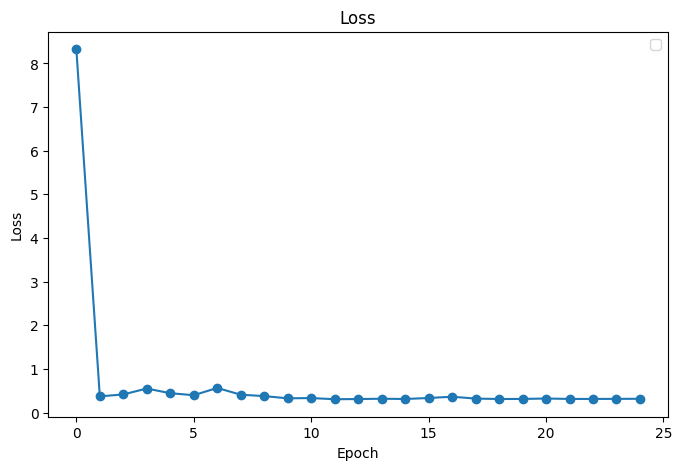

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(losses, marker='o')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

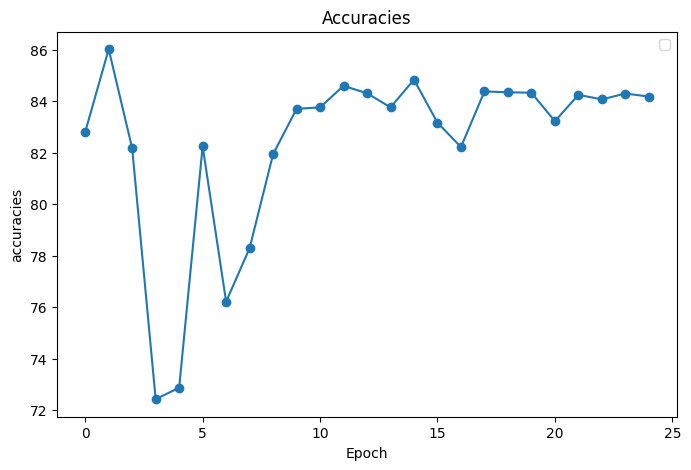

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(accuracies, marker='o')
plt.title('Accuracies')
plt.xlabel('Epoch')
plt.ylabel('accuracies')
plt.legend()
plt.show()

In [1]:
resnet50.eval()

with torch.no_grad():
    train_accuracy = 0
    for (data, targets) in train_data_loader:
        data = data.cuda()
        targets = targets.cuda()
        train_outputs = resnet50(data)
        _, predicted_train = torch.max(train_outputs, 1)
        train_accuracy += (predicted_train == targets).sum().item() / len(targets)
        # print(predicted_train)

print('\n train accuracy: ', (train_accuracy/len(train_data_loader))*100)


 train accuracy:  84.28304140127389


In [3]:
resnet50.eval()

with torch.no_grad():
    test_accuracy = 0
    for (data, targets) in test_data_loader:
        data = data.cuda()
        targets = targets.cuda()
        test_outputs = resnet50(data)
        _, predicted_test = torch.max(test_outputs, 1)
        test_accuracy += (predicted_test == targets).sum().item() / len(targets)

print('\n test accuracy: ', (test_accuracy/len(test_data_loader))*100)


 test accuracy:  82.044921875


---
# Part2

In [ ]:
!ls

data  q1_model1.pth


In [ ]:
!mkdir part2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader,Dataset,Subset
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.nn.modules import ReLU,Linear,Dropout
from torchvision.datasets import CIFAR10

import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

using `triple loss`.

Triplet Loss was first introduced in FaceNet: A Unified Embedding for Face Recognition and Clustering in 2015, and it has been one of the most popular loss functions for supervised similarity or metric learning ever since. In its simplest explanation, Triplet Loss encourages that dissimilar pairs be distant from any similar pairs by at least a certain margin value. Mathematically, the loss value can be calculated as `L=max(d(a, p) - d(a, n) + m, 0)`, where:

`p`, i.e., positive, is a sample that has the same label as `a`, i.e., anchor,

`n`, i.e., negative, is another sample that has a label different from `a`,

`d` is a function to measure the distance between these three samples,

and `m` is a margin value to keep negative samples far apart.


In [ ]:
class TripletDataset(Dataset):
    def __init__(self, root_dir, train, transform=None, selected_classes=[0,1]):
        self.root_dir = root_dir
        self.transform = transform

        self.cifar10_dataset = datasets.CIFAR10(
            root=self.root_dir,
            train=train,
            download=True,
            transform=transform)

        # select 'airplane' and 'automobile' class
        self.reduced_indices = [i for i in range(len(self.cifar10_dataset.targets)) if self.cifar10_dataset.targets[i] in selected_classes]
        self.reduced_dataset = Subset(self.cifar10_dataset, self.reduced_indices)

    def __getitem__(self, index):
        anchor, anchor_label = self.reduced_dataset[index]

        anch_label = torch.tensor(self.cifar10_dataset.targets)[self.reduced_indices]

        # get positive and negative indices
        pos_index = np.random.choice(torch.nonzero(anch_label == anchor_label).squeeze().numpy())
        neg_index = np.random.choice(torch.nonzero(anch_label != anchor_label).squeeze().numpy())

        # get positive and negative samples
        positive, _ = self.reduced_dataset[pos_index]
        negative, _ = self.reduced_dataset[neg_index]

        return anchor, positive, negative, anchor_label

    def __len__(self):
        return len(self.reduced_dataset)


transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

trip_train_dataset = TripletDataset(root_dir='./data',train=True,
                                           transform=transform)

trip_test_dataset = TripletDataset(root_dir='./data',train=False,
                                          transform=transform)

100%|██████████| 170498071/170498071 [00:04<00:00, 35469829.23it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# create DataLoader

batch_size = 128
triplet_train_loader = DataLoader(trip_train_dataset, batch_size=batch_size, shuffle=True)
triplet_test_loader = DataLoader(trip_test_dataset, batch_size=batch_size, shuffle=False)


In [4]:
# test the DataLoader
for (anchor, positive, negative, anchor_label) in triple_train_data_loader:
    print('\n',anchor.shape,positive.shape,negative.shape,anchor_label.shape)

    break


torch.Size([128, 3, 224, 224]) torch.Size([128, 3, 224, 224]) torch.Size([128, 3, 224, 224]) torch.Size([128])


In [ ]:
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        resnet50_FE = models.resnet50(weights='DEFAULT')
        resnet50_FE.fc = nn.Identity() 
        self.FE = resnet50_FE 

    def forward(self, x): 
        return self.FE(x) 

bad_FeatureExtractor = FeatureExtractor().to(device=device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 106MB/s]


In [ ]:
# loss function and optimizer

triplet_loss = nn.TripletMarginLoss()
optimizer    = torch.optim.Adam(bad_FeatureExtractor.parameters(), lr=0.001)
scheduler    = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 147MB/s]


In [ ]:
triple_losses = []
num_epochs = 15
# Train the model

for epoch in range(num_epochs):
    bad_FeatureExtractor.train()
    epoch_loss = 0.0

    for anchor, positive, negative, _ in tqdm(triplet_train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        optimizer.zero_grad()

        # get embeddings
        anchor_embedding = bad_FeatureExtractor(anchor.to(device))
        positive_embedding = bad_FeatureExtractor(positive.to(device))
        negative_embedding = bad_FeatureExtractor(negative.to(device))

        loss = triplet_loss(anchor_embedding,positive_embedding,negative_embedding)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    epoch_loss /= len(triplet_train_loader)

    scheduler.step()

    # print(f'Loss: {epoch_loss:.4f}')
    print('Epoch: {}, \tLoss: {:.5f}'.format(epoch,  epoch_loss))
    triple_losses.append(epoch_loss)

Epoch 1/15: 100%|██████████| 79/79 [02:25<00:00,  1.85s/it]


Epoch: 0, 	Loss: 1.70301


Epoch 2/15: 100%|██████████| 79/79 [02:18<00:00,  1.76s/it]


Epoch: 1, 	Loss: 0.38423


Epoch 3/15: 100%|██████████| 79/79 [02:17<00:00,  1.74s/it]


Epoch: 2, 	Loss: 0.13864


Epoch 4/15: 100%|██████████| 79/79 [02:23<00:00,  1.82s/it]


Epoch: 3, 	Loss: 0.07194


Epoch 5/15: 100%|██████████| 79/79 [02:33<00:00,  1.94s/it]


Epoch: 4, 	Loss: 0.04546


Epoch 6/15: 100%|██████████| 79/79 [02:17<00:00,  1.74s/it]


Epoch: 5, 	Loss: 0.02685


Epoch 7/15: 100%|██████████| 79/79 [02:18<00:00,  1.75s/it]


Epoch: 6, 	Loss: 0.01576


Epoch 8/15: 100%|██████████| 79/79 [02:18<00:00,  1.75s/it]


Epoch: 7, 	Loss: 0.03167


Epoch 9/15: 100%|██████████| 79/79 [02:12<00:00,  1.67s/it]


Epoch: 8, 	Loss: 0.01373


Epoch 10/15: 100%|██████████| 79/79 [02:15<00:00,  1.71s/it]


Epoch: 9, 	Loss: 0.00873


Epoch 11/15: 100%|██████████| 79/79 [02:11<00:00,  1.67s/it]


Epoch: 10, 	Loss: 0.00409


Epoch 12/15: 100%|██████████| 79/79 [02:13<00:00,  1.69s/it]


Epoch: 11, 	Loss: 0.00579


Epoch 13/15: 100%|██████████| 79/79 [02:10<00:00,  1.65s/it]


Epoch: 12, 	Loss: 0.00424


Epoch 14/15: 100%|██████████| 79/79 [02:14<00:00,  1.70s/it]


Epoch: 13, 	Loss: 0.00452


Epoch 15/15: 100%|██████████| 79/79 [02:10<00:00,  1.66s/it]

Epoch: 14, 	Loss: 0.00767


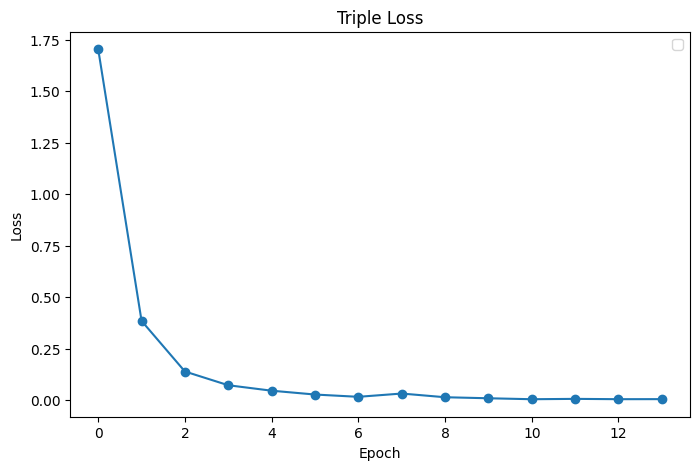

In [3]:
plt.figure(figsize=(8, 5))

plt.plot(triple_losses, marker='o')
plt.title('Triple Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
torch.save(bad_FeatureExtractor.state_dict(), '/content/drive/My Drive/DEEP/Q1/part2/resnet_FE.pth')

In [ ]:
class MyClassifier2(nn.Module):
    def __init__(self,featureExtractor):
        super(MyClassifier2, self).__init__()
        # freeze paramters of FE.
        for param in featureExtractor.parameters():
            param.requires_grad = False

        featureExtractor.fc = torch.nn.Sequential(
            Linear(in_features=1000, out_features=4096, bias=True),
            ReLU(inplace=True),
            Dropout(p=0.5, inplace=False),
            Linear(in_features=4096, out_features=2048, bias=True),
            ReLU(inplace=True),
            Dropout(p=0.5, inplace=False),
            Linear(in_features=2048, out_features=2, bias=True),
        )
        self.feature_extractor = featureExtractor


    def forward(self, x):
        x = self.feature_extractor(x)
        return x

In [ ]:
myclassifier2 = MyClassifier2(bad_FeatureExtractor).to(device)

# Define loss and optimizer
optimizer = torch.optim.Adam(MyClassifier2.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
criterion = torch.nn.CrossEntropyLoss()

In [ ]:
loss_list2 = []
accuracy_list = []

num_epochs = 15

for epoch in range(num_epochs):
    myclassifier2.train()

    epoch_loss = 0.0
    accuracies = []

    for data, targets in tqdm(train_data_loader, desc=f'epoch {epoch+1}/{num_epochs}'):
        data = data.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        outputs = myclassifier2(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        correct = (predicted == targets).sum().item()

        accuracies.append(correct / targets.size(0))

    epoch_loss /= len(train_data_loader)
    accuracy = np.mean(accuracies)

    scheduler.step()

    print(f'Loss: {epoch_loss:.4f}, Accuracy: {100*accuracy:.2f}%')
    loss_list2.append(epoch_loss)
    accuracy_list.append(100*accuracy)


epoch 1/15: 100%|██████████| 79/79 [00:10<00:00,  7.44it/s]


Loss: 0.5512, Accuracy: 94.34%


epoch 2/15: 100%|██████████| 79/79 [00:04<00:00, 18.41it/s]


Loss: 0.3571, Accuracy: 99.69%


epoch 3/15: 100%|██████████| 79/79 [00:04<00:00, 17.77it/s]


Loss: 0.2569, Accuracy: 99.75%


epoch 4/15: 100%|██████████| 79/79 [00:03<00:00, 21.72it/s]


Loss: 0.1967, Accuracy: 99.66%


epoch 5/15: 100%|██████████| 79/79 [00:03<00:00, 21.49it/s]


Loss: 0.1567, Accuracy: 99.71%


epoch 6/15: 100%|██████████| 79/79 [00:04<00:00, 16.88it/s]


Loss: 0.1268, Accuracy: 99.81%


epoch 7/15: 100%|██████████| 79/79 [00:04<00:00, 18.98it/s]


Loss: 0.1063, Accuracy: 99.83%


epoch 8/15: 100%|██████████| 79/79 [00:03<00:00, 22.55it/s]


Loss: 0.0913, Accuracy: 99.87%


epoch 9/15: 100%|██████████| 79/79 [00:05<00:00, 15.02it/s]


Loss: 0.0794, Accuracy: 99.88%


epoch 10/15: 100%|██████████| 79/79 [00:04<00:00, 16.17it/s]


Loss: 0.0710, Accuracy: 99.88%


epoch 11/15: 100%|██████████| 79/79 [00:03<00:00, 21.90it/s]


Loss: 0.0666, Accuracy: 99.93%


epoch 12/15: 100%|██████████| 79/79 [00:03<00:00, 22.35it/s]


Loss: 0.0684, Accuracy: 99.78%


epoch 13/15: 100%|██████████| 79/79 [00:03<00:00, 20.80it/s]


Loss: 0.0668, Accuracy: 99.83%


epoch 14/15: 100%|██████████| 79/79 [00:04<00:00, 16.61it/s]


Loss: 0.0666, Accuracy: 99.87%


epoch 15/15: 100%|██████████| 79/79 [00:03<00:00, 21.64it/s]

Loss: 0.0644, Accuracy: 99.81%


In [ ]:
torch.save(myclassifier2.state_dict(), '/content/drive/My Drive/DEEP/Q1/part2/resnet_full.pth')

myclassifier2.load_state_dict(torch.load('/content/drive/My Drive/DEEP/Q1/part2/resnet_full.pth'))

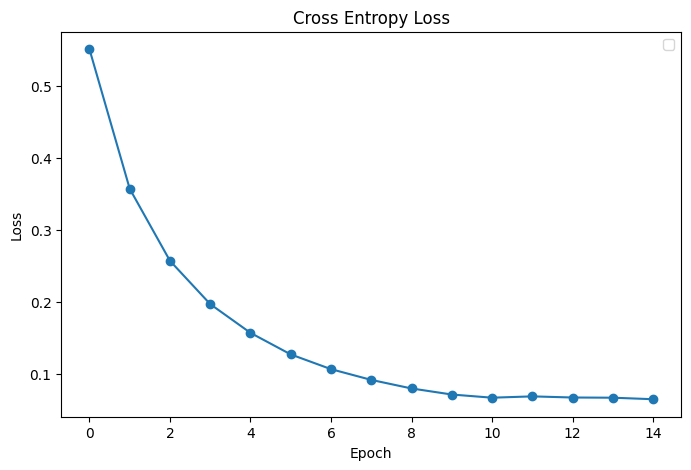

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(loss_list2, marker='o')
plt.title('Cross Entropy Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Accuracy diagram is almost a straight line. That is why it is not drawn.

In [ ]:
myclassifier2.eval()
with torch.no_grad():
    train_accuracy = 0
    for (data, targets) in tqdm(train_data_loader):
        data = data.cuda()
        targets = targets.cuda()
        train_outputs = myclassifier2(data)
        _, predicted_train = torch.max(train_outputs, 1)
        train_accuracy += (predicted_train == targets).sum().item() / len(targets)


print(f'train accuracy : {(train_accuracy/len(train_data_loader))*100:.5f}%')

100%|██████████| 79/79 [00:04<00:00, 16.07it/s]

train accuracy : 99.87144%


In [ ]:
myclassifier2.eval()
with torch.no_grad():
    test_accuracy = 0
    for (data, targets) in tqdm(test_data_loader):
        data = data.cuda()
        targets = targets.cuda()
        test_outputs = myclassifier2(data)
        _, predicted_test = torch.max(test_outputs, 1)
        test_accuracy += (predicted_test == targets).sum().item() / len(targets)

print(f'test accuracy : {(test_accuracy/len(test_data_loader))*100:.5f}%')

100%|██████████| 16/16 [00:00<00:00, 18.77it/s]

test accuracy : 97.24609%


----
# part3

In [ ]:
class EndToEndCLF(nn.Module):
    def __init__(self):
        super(EndToEndCLF, self).__init__()

        self.feature_extractor = models.resnet50(weights='DEFAULT')
        self.feature_extractor.fc = nn.Identity()
        self.classifier = torch.nn.Sequential(
        Linear(in_features=2048, out_features=4096, bias=True),
        ReLU(inplace=True),
        Dropout(p=0.5, inplace=False),
        Linear(in_features=4096, out_features=2048, bias=True),
        ReLU(inplace=True),
        Dropout(p=0.5, inplace=False),
        Linear(in_features=2048, out_features=2, bias=True),
        )

    def forward(self, x):
        features = self.feature_extractor(x)
        predictions = self.classifier(features)
        return features, predictions

myclassifier3 = EndToEndCLF().to(device)

# Define loss and optimizer
optimizer = torch.optim.Adam(myclassifier3.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
criterion = torch.nn.CrossEntropyLoss()
triplet_loss = nn.TripletMarginLoss()


In [ ]:
loss_list = []
loss_triple_list = []
loss_ce_list = []

num_epochs = 20

for epoch in range(num_epochs):
    myclassifier3.train()
    total_loss = 0.0
    loss_triple = 0.0
    loss_ce = 0.0
    accuracy_list = []

    for anchor, positive, negative, label in tqdm(triplet_train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        label = label.to(device)

        optimizer.zero_grad()

        anchor_embedding, pred = myclassifier3(anchor.to(device))
        positive_embedding, _  = myclassifier3(positive.to(device))
        negative_embedding, _  = myclassifier3(negative.to(device))

        loss_tri = triplet_loss(
            anchor_embedding,
            positive_embedding,
            negative_embedding
        )

        loss_ce = criterion(pred, label)
        # total loss
        loss = loss_tri + loss_ce

        loss.backward()
        optimizer.step()

        # Update running loss
        total_loss += loss.item()
        loss_triple += loss_tri.item()
        loss_ce += loss_ce.item()

         # Measure accuracy
        _, predicted = torch.max(pred, 1)
        correct = (predicted == label).sum().item()
        accuracy_list.append(correct/label.size(0))

    epoch_loss = total_loss / len(triplet_train_loader)
    epoch_loss_triple = loss_triple / len(triplet_train_loader)
    epoch_loss_ce = loss_ce / len(triplet_train_loader)

    accuracy = np.mean(accuracy_list)
    scheduler.step()

    print(f'Accuracy: {100*accuracy:.2f}, Total Loss: {epoch_loss:.4f}\n, Triple Loss: {epoch_loss_triple:.4f}, , CE Loss: {epoch_loss-epoch_loss_triple:.4f}')
    loss_list.append(epoch_loss)
    loss_triple_list.append(epoch_loss_triple)
    loss_ce_list.append(epoch_loss-epoch_loss_triple)


Epoch 1/20: 100%|██████████| 79/79 [02:20<00:00,  1.78s/it]


Accuracy: 97.87, Total Loss: 0.1954
, Triple Loss: 0.1221, , CE Loss: 0.0733


Epoch 2/20: 100%|██████████| 79/79 [02:23<00:00,  1.82s/it]


Accuracy: 99.02, Total Loss: 0.1031
, Triple Loss: 0.0639, , CE Loss: 0.0392


Epoch 3/20: 100%|██████████| 79/79 [02:20<00:00,  1.77s/it]


Accuracy: 99.47, Total Loss: 0.0567
, Triple Loss: 0.0335, , CE Loss: 0.0232


Epoch 4/20: 100%|██████████| 79/79 [02:23<00:00,  1.82s/it]


Accuracy: 99.67, Total Loss: 0.0373
, Triple Loss: 0.0218, , CE Loss: 0.0155


Epoch 5/20: 100%|██████████| 79/79 [02:40<00:00,  2.03s/it]


Accuracy: 99.67, Total Loss: 0.0333
, Triple Loss: 0.0201, , CE Loss: 0.0132


Epoch 6/20: 100%|██████████| 79/79 [02:27<00:00,  1.87s/it]


Accuracy: 99.39, Total Loss: 0.0664
, Triple Loss: 0.0421, , CE Loss: 0.0244


Epoch 7/20: 100%|██████████| 79/79 [02:13<00:00,  1.70s/it]


Accuracy: 99.52, Total Loss: 0.0402
, Triple Loss: 0.0240, , CE Loss: 0.0162


Epoch 8/20: 100%|██████████| 79/79 [02:17<00:00,  1.74s/it]


Accuracy: 99.87, Total Loss: 0.0129
, Triple Loss: 0.0069, , CE Loss: 0.0060


Epoch 9/20: 100%|██████████| 79/79 [02:14<00:00,  1.70s/it]


Accuracy: 99.93, Total Loss: 0.0101
, Triple Loss: 0.0069, , CE Loss: 0.0032


Epoch 10/20: 100%|██████████| 79/79 [02:13<00:00,  1.70s/it]


Accuracy: 99.98, Total Loss: 0.0048
, Triple Loss: 0.0017, , CE Loss: 0.0031


Epoch 11/20: 100%|██████████| 79/79 [02:15<00:00,  1.71s/it]


Accuracy: 99.98, Total Loss: 0.0031
, Triple Loss: 0.0011, , CE Loss: 0.0020


Epoch 12/20: 100%|██████████| 79/79 [02:12<00:00,  1.68s/it]


Accuracy: 100.00, Total Loss: 0.0021
, Triple Loss: 0.0003, , CE Loss: 0.0017


Epoch 13/20: 100%|██████████| 79/79 [02:12<00:00,  1.67s/it]


Accuracy: 100.00, Total Loss: 0.0016
, Triple Loss: 0.0000, , CE Loss: 0.0015


Epoch 14/20: 100%|██████████| 79/79 [02:14<00:00,  1.70s/it]


Accuracy: 100.00, Total Loss: 0.0013
, Triple Loss: 0.0001, , CE Loss: 0.0013


Epoch 15/20: 100%|██████████| 79/79 [02:12<00:00,  1.68s/it]


Accuracy: 100.00, Total Loss: 0.0016
, Triple Loss: 0.0005, , CE Loss: 0.0011


Epoch 16/20: 100%|██████████| 79/79 [02:12<00:00,  1.67s/it]


Accuracy: 99.99, Total Loss: 0.0015
, Triple Loss: 0.0002, , CE Loss: 0.0012


Epoch 17/20: 100%|██████████| 79/79 [02:16<00:00,  1.73s/it]


Accuracy: 100.00, Total Loss: 0.0010
, Triple Loss: 0.0001, , CE Loss: 0.0010


Epoch 18/20: 100%|██████████| 79/79 [02:12<00:00,  1.68s/it]


Accuracy: 100.00, Total Loss: 0.0012
, Triple Loss: 0.0001, , CE Loss: 0.0011


Epoch 19/20: 100%|██████████| 79/79 [02:12<00:00,  1.68s/it]


Accuracy: 100.00, Total Loss: 0.0018
, Triple Loss: 0.0004, , CE Loss: 0.0014


Epoch 20/20: 100%|██████████| 79/79 [02:12<00:00,  1.68s/it]

Accuracy: 100.00, Total Loss: 0.0027
, Triple Loss: 0.0009, , CE Loss: 0.0017


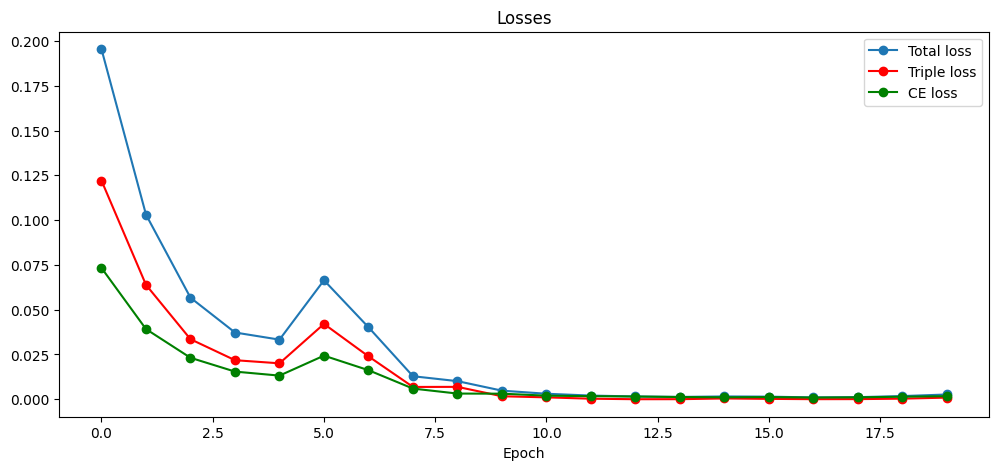

In [ ]:

plt.figure(figsize=(12, 5))

plt.plot(loss_list, marker='o')
plt.plot(loss_triple_list, marker='o',c='r')
plt.plot(loss_ce_list, marker='o',c='g')

plt.title('Losses')
plt.xlabel('Epoch')
plt.legend(['Total loss','Triple loss','CE loss'])
plt.show()


Accuracy diagram is almost a straight line. That is why it is not drawn.

In [ ]:
myclassifier3.eval()
with torch.no_grad():
    train_accuracy = 0
    for (data, targets) in tqdm(train_data_loader):
        data = data.cuda()
        targets = targets.cuda()
        train_outputs = myclassifier3(data)
        _, predicted_train = torch.max(train_outputs, 1)
        train_accuracy += (predicted_train == targets).sum().item() / len(targets)


print(f'\n train accuracy : {(train_accuracy/len(train_data_loader))*100:.5f}')

100%|██████████| 79/79 [00:03<00:00, 20.81it/s]


 train accuracy : 99.71382


In [ ]:
myclassifier3.eval()
with torch.no_grad():
    test_accuracy = 0
    for (data, targets) in tqdm(test_data_loader):
        data = data.cuda()
        targets = targets.cuda()
        test_outputs = myclassifier3(data)
        _, predicted_test = torch.max(test_outputs, 1)
        test_accuracy += (predicted_test == targets).sum().item() / len(targets)

print(f'\n test accuracy : {(test_accuracy/len(test_data_loader))*100:.5f}')

100%|██████████| 16/16 [00:01<00:00, 13.61it/s]


 test accuracy : 99.60786


In [ ]:
torch.save(myclassifier3.state_dict(), '/content/drive/My Drive/DEEP/Q1/part3/resnet_endtoend.pth')

# **END :\**